In [1]:
#!pip install matplotlib # 2-D plot library

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set a style for consistent visuals
plt.style.use('seaborn-v0_8-whitegrid')  # Good for presentations

In [3]:
import pandas as pd # to load dataset
import numpy as np

In [4]:
df = pd.read_csv("datasets/sample_non_timeseries.csv")
df.shape

(100, 4)

In [5]:
df.columns

Index(['Category', 'Sales', 'Profit', 'Region'], dtype='object')

In [6]:
df["Category"].unique()

array(['C', 'D', 'A', 'B'], dtype=object)

In [7]:
df["Region"].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [8]:
df["Day"] = list(range(1,101))
df.head()

,Category,Sales,Profit,Region,Day
0,C,802,64.40,West,1
1,D,501,58.59,South,2
2,A,829,28.28,North,3
3,C,655,94.86,East,4
4,C,261,63.90,North,5


### Line Plot

You want to show progression or change in a numerical variable across a sequence (even if it's not time).

TIP: Use line plots for time series, continuous data, or when you want to show trends.

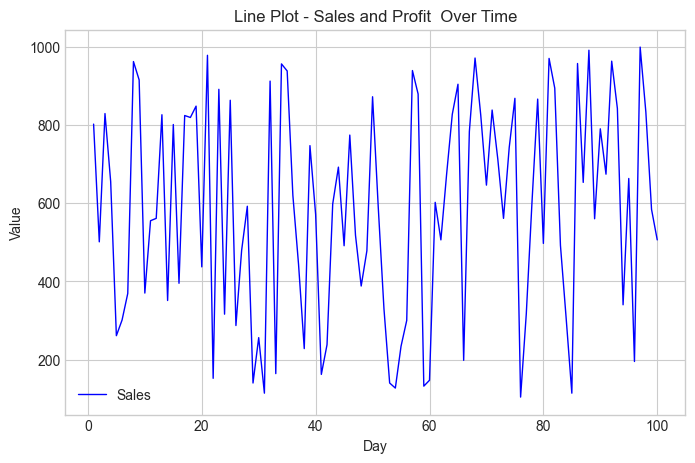

In [9]:
plt.figure(figsize=(8,5))
plt.plot(df["Day"], df["Sales"], label="Sales", color="b", linestyle="-", linewidth=1)
# plt.plot(df["Day"], df["Profit"], label="Profit", color="g", linestyle="-.", linewidth=.5)
plt.legend()
plt.xlabel("Day")
plt.ylabel("Value")
plt.title("Line Plot - Sales and Profit  Over Time")
plt.show()

### Scatter Plot

Tip: Scatter plots are useful for showing relationships between two continuous variables

Outliers: Do you notice any dots far from the main cluster.

Clusters: Are there tight groupings suggesting similar behavior?

Correlation: If dots generally form a rising or falling slope — that’s correlation.

This plot helps us see patterns — for example:

Are higher sales always leading to higher profits?

Are there outliers — like high sales but very low or even negative profit?

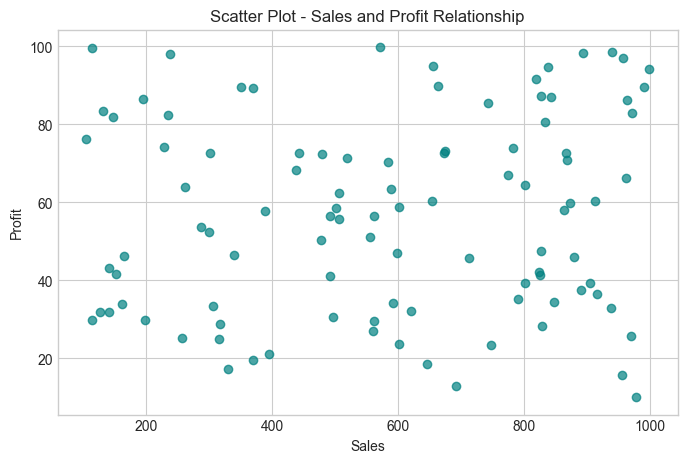

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(df["Sales"], df["Profit"], color="teal", alpha=0.7)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Scatter Plot - Sales and Profit Relationship")
plt.show()

### Bar Plot

Bar plots are great for categorical comparisons

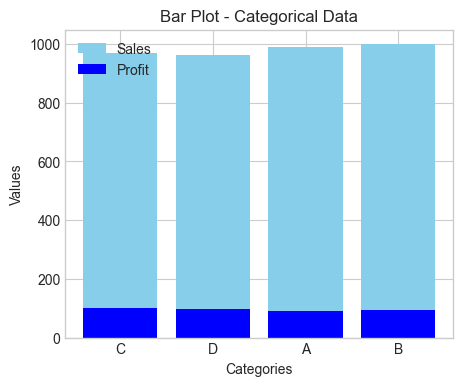

In [11]:
# Bad plot - Overlapping Sales and Profits
plt.figure(figsize=(5, 4))
plt.bar(df["Category"], df["Sales"], color='skyblue', label='Sales')
plt.bar(df["Category"], df["Profit"], color='blue', label='Profit')
plt.title('Bar Plot - Categorical Data')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

Bar plots are more meaningful when aggregates stats are calculated

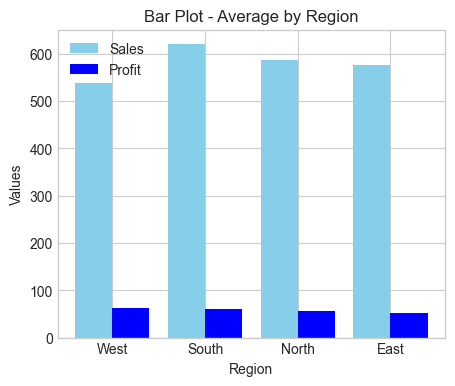

In [12]:
plt.figure(figsize=(5, 4)) # for horizontal bar charts use barh()
xpos = np.arange(df["Region"].nunique())
width = 0.4  # width of the bars
plt.xticks(xpos, df["Region"].unique())
df_grouped = df.groupby(['Region'])[['Sales', 'Profit']].mean().reset_index()
plt.bar(xpos-0.2, df_grouped['Sales'], color='skyblue', width=width, label='Sales')
plt.bar(xpos+0.2, df_grouped['Profit'], color='blue', width=width, label='Profit')
plt.title('Bar Plot - Average by Region')
plt.xlabel('Region')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

### Histogram

 Histograms show the distribution of a numerical variable

When to Use This Plot:

To see skewness, outliers, or distribution shape (normal, right-skewed, etc.).

Before applying statistical models that assume certain distributions.

To detect data quality issues or anomalies.

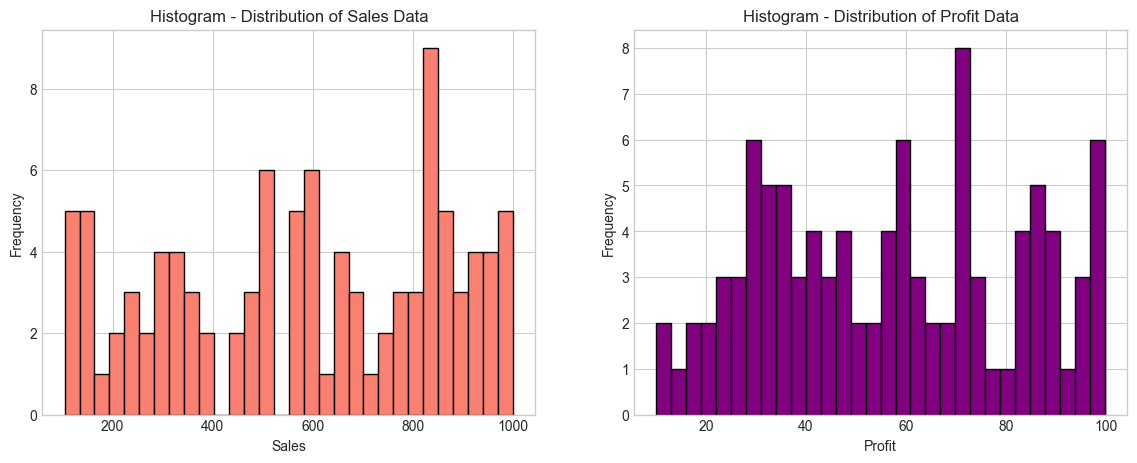

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax[0].hist(df['Sales'], bins=30, color='salmon', edgecolor='black')
ax[0].set_title('Histogram - Distribution of Sales Data')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['Profit'], bins=30, color='purple', edgecolor='black')
ax[1].set_title('Histogram - Distribution of Profit Data')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('Frequency')
# Save the figure
plt.savefig("Histogram - Distribution(Sales & Profit).pdf", dpi=300, bbox_inches='tight', transparent=True) # bbox_inches-Crops extra whitespace and extracts the chart properly without cutting it
# dpi-for high resolution, transparent=True, so the background is clean if used on slides or reports.
plt.show()

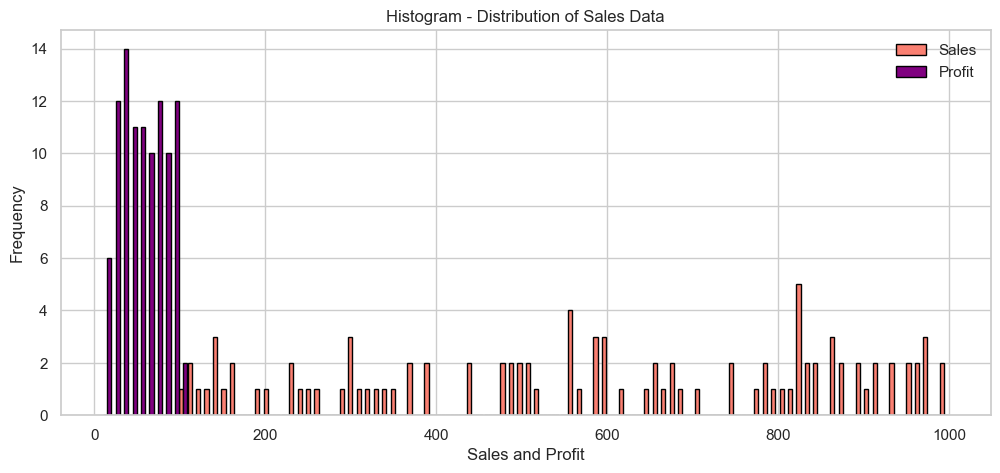

In [30]:
plt.figure(figsize=(12, 5))
plt.hist(df[['Sales', 'Profit']], bins=100, color= ['salmon', 'purple'], rwidth=0.98, edgecolor='black', label=['Sales', 'Profit'], orientation='vertical') # bins=5 or bins=[200, 400, 600, 800, 1000]
plt.title('Histogram - Distribution of Sales Data') #rwidth controls the size of rectangle
plt.xlabel('Sales and Profit')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

### Pie Chart

Pie charts show proportions, best for showing part-to-whole relationships

TIP: Use sparingly; bar charts are often more readable.

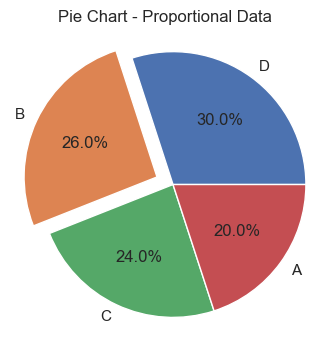

In [32]:
plt.figure(figsize=(4, 4))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', radius=1.5, explode=[0,0.2,0,0]) #radius=size of pie, explode brings the portion out. 
# Bring the 2nd slice of pie out by a distance of 0.2 — useful to emphasize a particular category.
# df['Region'].value_counts().plot.pie(autopct='%1.1f%%') 
# df[['Category', 'Region']].value_counts().plot.pie(autopct='%1.1f%%') # autopct='%1.1f%%' controls how the percentage values are formatted and displayed on each slice. 

plt.title('Pie Chart - Proportional Data')
plt.axis('equal')  # Makes the pie circular, not oval
plt.ylabel("")  # Optional: Hide y-label for aesthetics
plt.show()

### Bonus - Seaborn  Box plot & Heatmap (Correlation Matrix)

In [15]:
#!pip install seaborn

In [12]:
import seaborn as sns

### Box Plot

Box plots are used to show spread and detect outliers

TIP: Box plots are excellent for comparing distributions across groups.

The median (middle line in the box),

The interquartile range (the box itself),

And any outliers (points outside the whiskers).

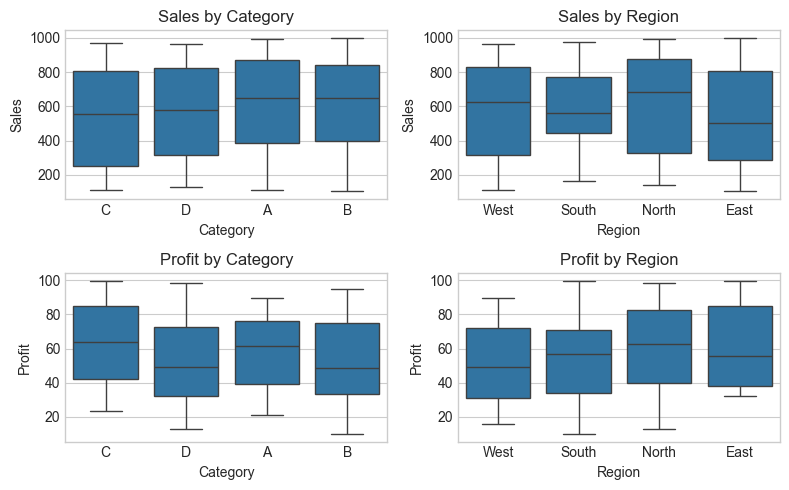

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(8, 5))
sns.boxplot(x='Category', y='Sales', data=df, ax=ax[0,0])
ax[0,0].set_title('Sales by Category')        
sns.boxplot(x='Region', y='Sales', data=df, ax=ax[0,1])
ax[0,1].set_title('Sales by Region')
sns.boxplot(x='Category', y='Profit', data=df, ax=ax[1,0])
ax[1,0].set_title('Profit by Category')
sns.boxplot(x='Region', y='Profit', data=df, ax=ax[1,1])
ax[1,1].set_title('Profit by Region')
# ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Boxplot: Utiling a SubCategory column for analysis using 'hue'

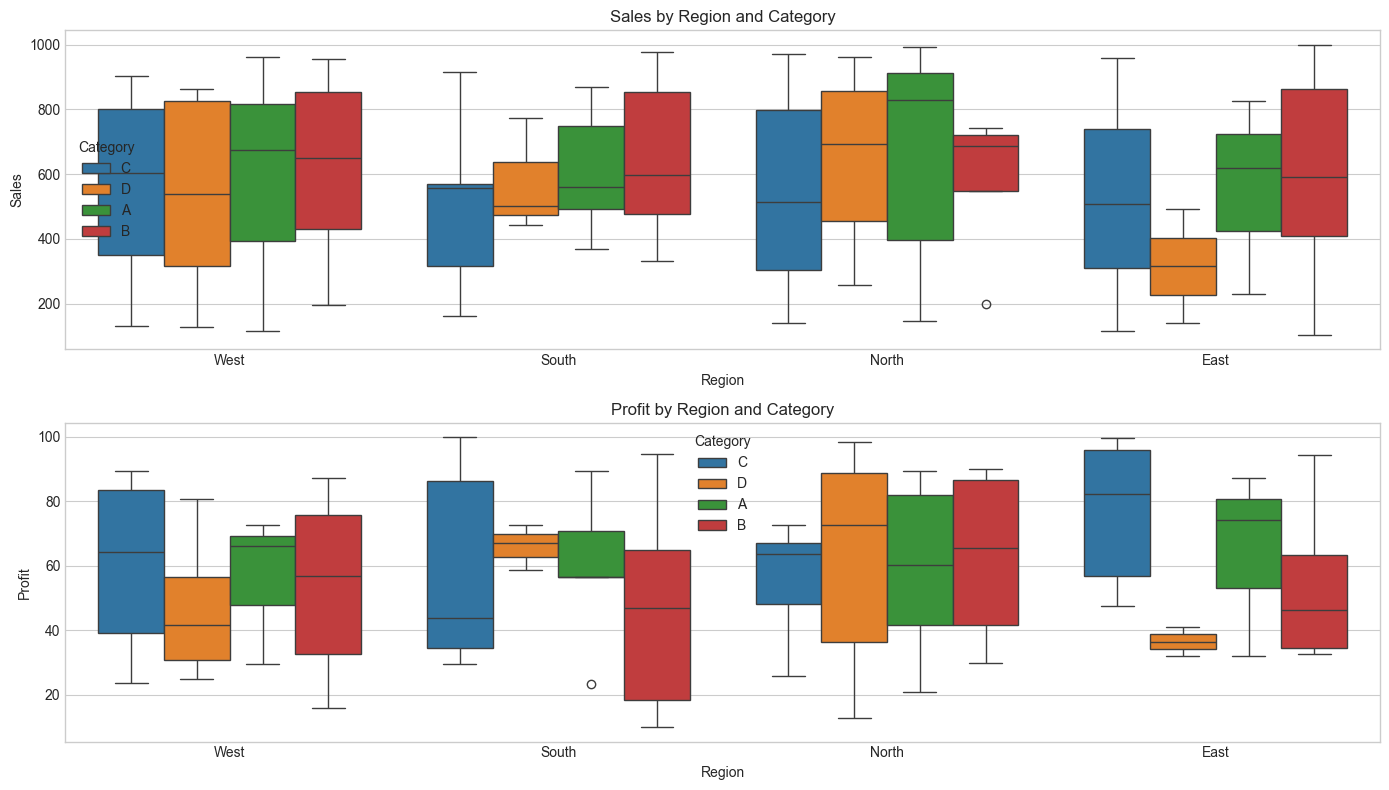

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(14, 8))
# First subplot: Sales by Region, colored by Category
sns.boxplot(x='Region', y='Sales', hue='Category', data=df, ax=ax[0])
ax[0].set_title('Sales by Region and Category')
ax[0].legend(title='Category', loc='best') 
# ax[0].tick_params(axis='x', rotation=45)

# Second subplot: Profit by Region, colored by Category
sns.boxplot(x='Region', y='Profit', hue='Category', data=df, ax=ax[1])
ax[1].set_title('Profit by Region and Category')
# ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Category', loc='best') 
plt.tight_layout()
plt.show()

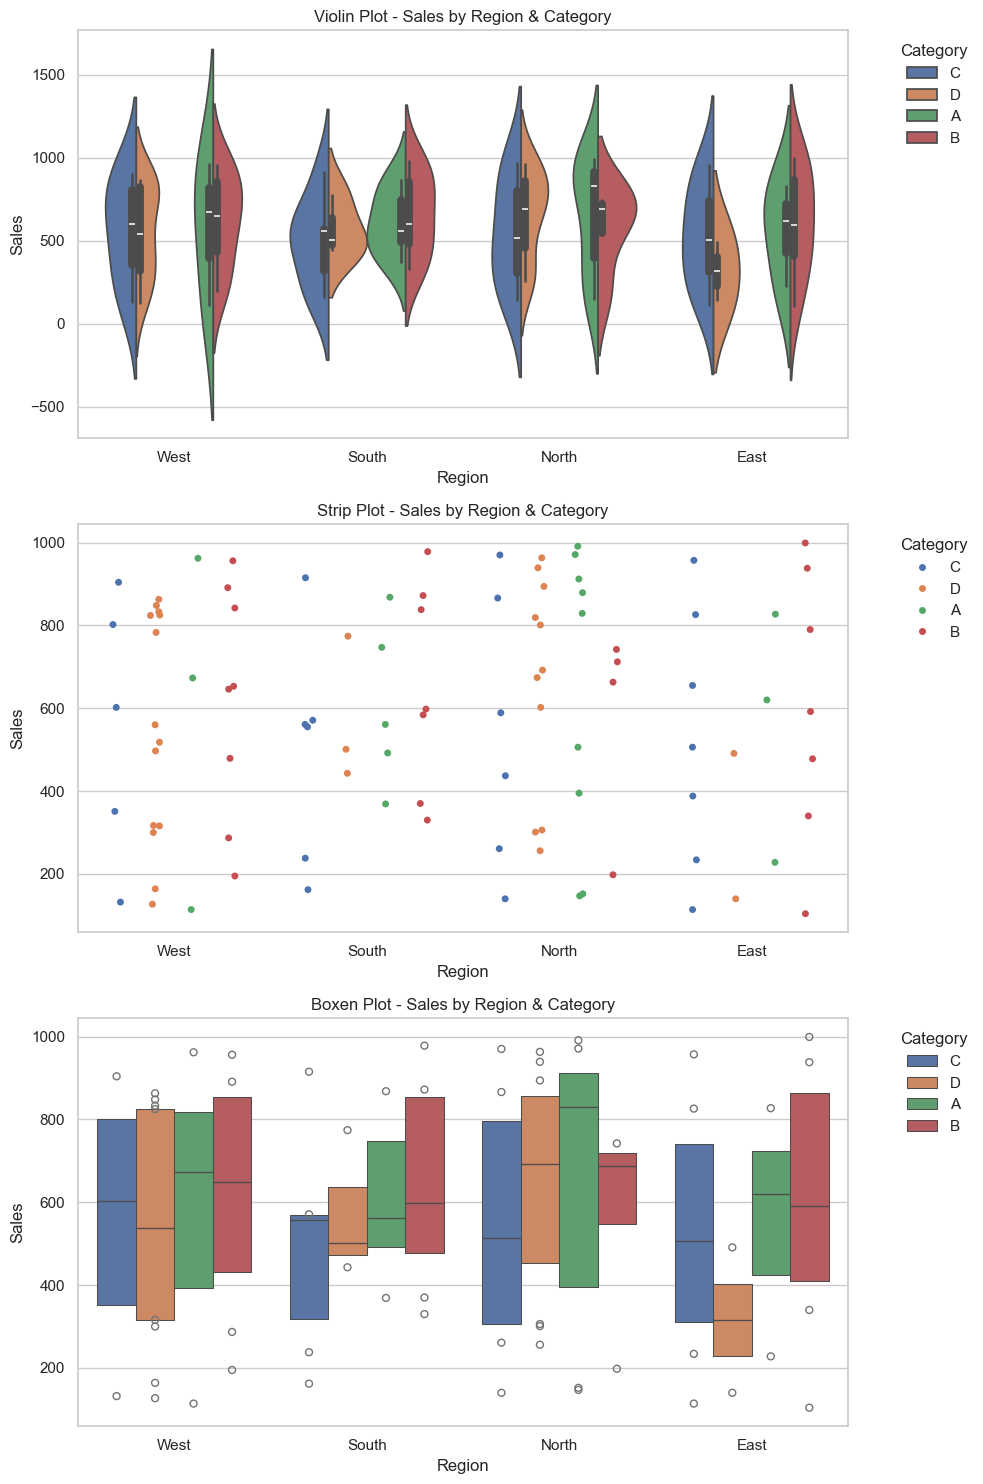

In [20]:
# Set the style
sns.set(style="whitegrid")

# Create subplots: 3 rows, 1 column
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# 1. Violin Plot - See full distribution shape (density + quartiles)
# It combines a box plot with a kernel density estimate — so you can see both the distribution shape and quartiles.
sns.violinplot(x='Region', y='Sales', hue='Category', data=df, ax=ax[0], split=True) # Use split=True in violinplot for side-by-side halves (only works with 2 hue levels)

ax[0].set_title('Violin Plot - Sales by Region & Category')
# ax[0].tick_params(axis='x', rotation=45)

# 2. Strip Plot (can be layered over boxplot/violin too) - Raw individual data points (jittered)
# A scatter-like visualization of the raw data points.
# jitter=True spreads overlapping points for better visibility.
# dodge=True separates them by Category.
Strip plots are very useful to understand individual observations and data density.
sns.stripplot(x='Region', y='Sales', hue='Category', data=df, ax=ax[1], dodge=True, jitter=True)
ax[1].set_title('Strip Plot - Sales by Region & Category')
# ax[1].tick_params(axis='x', rotation=45)

# 3. Boxen Plot (good for large data with deep distributions)
# It displays multiple quantiles, especially in the tails, which helps you understand the depth and spread better than a regular boxplot.
sns.boxenplot(x='Region', y='Sales', hue='Category', data=df, ax=ax[2])
ax[2].set_title('Boxen Plot - Sales by Region & Category')
# ax[2].tick_params(axis='x', rotation=45)

# Clean up legends
for axes in ax:
    axes.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='best')

plt.tight_layout()
plt.show()


### Heatmap (Correlation Matrix)

TIP: Always check correlations before building ML models.

A correlation matrix shows how strongly pairs of variables are related:

+1 means a perfect positive correlation.

-1 means a perfect negative correlation.

0 means no linear relationship.

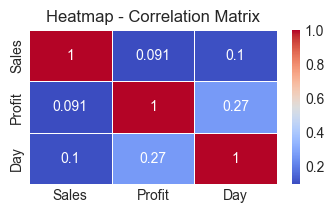

In [19]:
# Great for visualizing correlation and matrix data
plt.figure(figsize=(4, 2))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5) # annot-displays the numeric values in each cell.
# cmap='coolwarm' sets the color gradient from cool (low) to warm (high), linewidths-adds grid lines between cells for clarity.
plt.title('Heatmap - Correlation Matrix')
plt.show()

### Ploting Timeseries data using matplotlib

In [23]:
df_timeseries = pd.read_csv("datasets/complex_time_series.csv", parse_dates=['Date']) # parse_dates- Automatically converts date strings to datetime.
df_timeseries.shape

(90, 3)

In [24]:
df_timeseries.head()

,Date,Main_Metric,Secondary_Metric
0,2024-01-01,14.65,27.92
1,2024-01-02,15.41,28.28
2,2024-01-03,13.68,25.77
3,2024-01-04,11.62,25.03
4,2024-01-05,8.57,23.61


In [25]:
df_timeseries.isna().sum()

Date                 0
Main_Metric         10
Secondary_Metric     0
dtype: int64

In [27]:
# Fill missing values to avoid breaking the plot due to NaN, this is essential for calculations like rolling averages
df_filled = df_timeseries.copy()
df_filled.set_index('Date', inplace=True)
df_filled['Main_Metric'] = df_filled['Main_Metric'].interpolate(method='time')
# Time-based interpolation is especially important in time series data, where linear interpolation between time points makes sense 
# (instead of using a simple mean or median).
# It preserves trends and helps maintain the temporal structure of the data, which would be critical in forecasting, trend analysis, etc.

### Common Interpolation Methods:

Method	What It Does

'linear' -	Straight line between points (default)

'time' -	Respects datetime index (for time series)

'spline' -	Smooth curve fitting

'nearest' -	Fills with nearest non-null value

'pad' -	Forward fill (uses previous value)

'bfill' -	Backward fill (uses next value)

In [28]:
import numpy as np
from datetime import datetime, timedelta

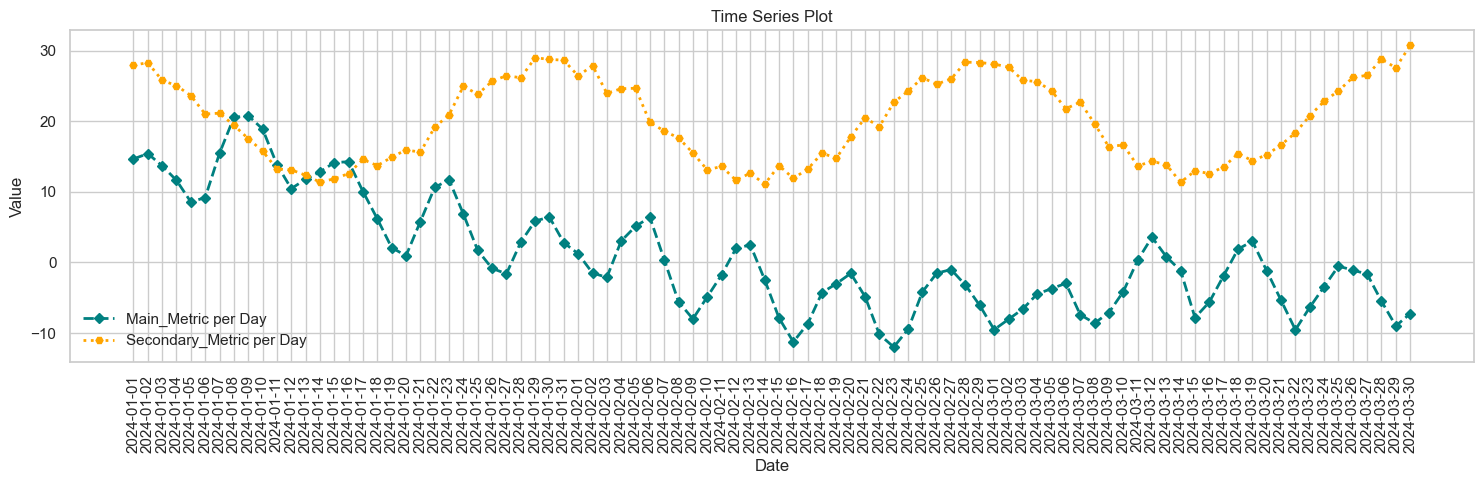

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df_filled.index, df_filled["Main_Metric"], color="teal", marker="D", linewidth=2, linestyle="--", markersize="5", label='Main_Metric per Day')
plt.plot(df_filled.index, df_filled["Secondary_Metric"], color="orange", marker="H", linewidth=2, linestyle=":", markersize="5", label='Secondary_Metric per Day')
# for x, y in zip(df_filled['Date'], df_filled['Main_Metric']):
#     plt.text(x, y + 0.3, f'{y:.1f}', ha='center', va='bottom', fontsize=8, rotation=90) # ha and va adjust the horizontal and vertical alignment of the text.
# for x, y in zip(df_filled['Date'], df_filled['Secondary_Metric']):
#     plt.text(x, y + 0.3, f'{y:.1f}', ha='center', va='bottom', fontsize=8, rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True) # Helps readability of time-based trends
# plt.xticks(rotation=90) # Rotates x-axis labels to prevent overlap
plt.xticks(ticks=df_filled.index, labels=df_filled.index.strftime('%Y-%m-%d'), rotation=90)
plt.tight_layout() # Adjust layout to avoid cutoff, Avoids overlapping of labels and axes.
plt.legend(loc='best') # to show labels
plt.show()

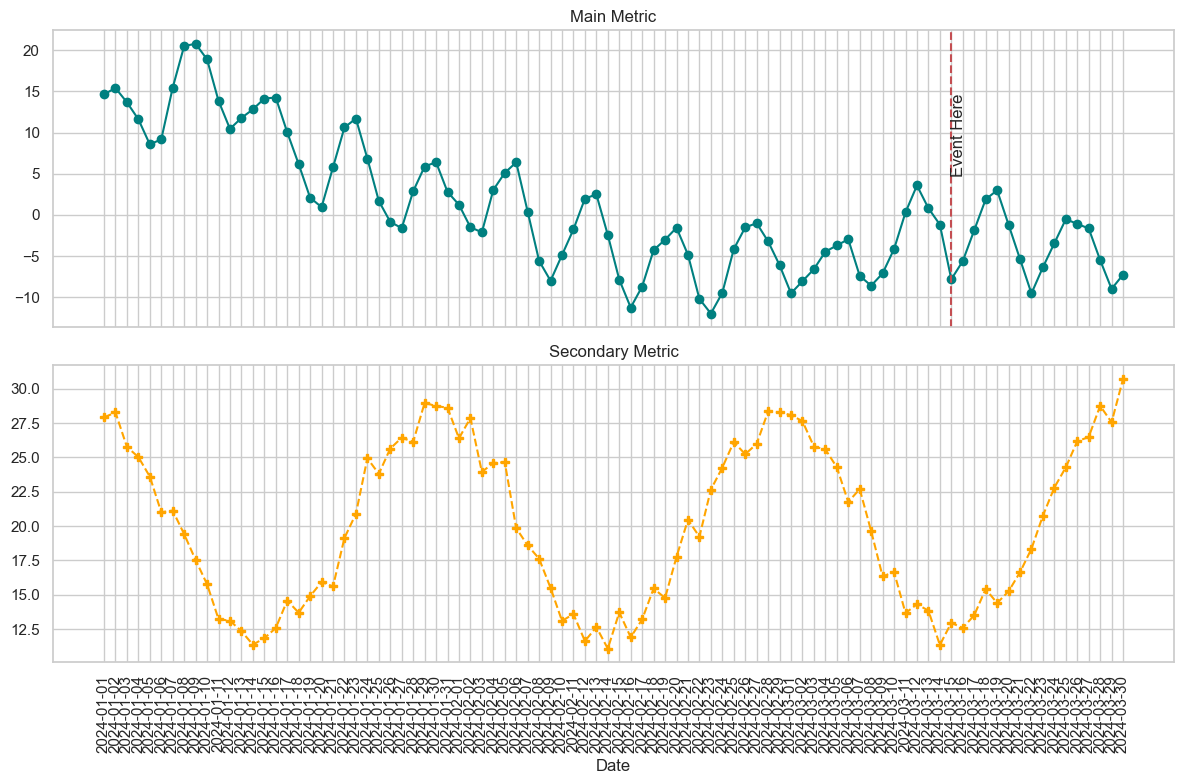

In [31]:
# Understanding subplots
# You can use .set_title(), .set_xlabel(), .set_ylabel(), and .grid(True) on each subplot individually.
# using 2 x 1 grid
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# if we use fig, ax = plt.subplots(2, 2) i.e 2 x 2 grid, we would have ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]

# First subplot - Main Metric
ax[0].plot(df_filled.index, df_filled['Main_Metric'], color='teal', marker='o', label='Main_Metric per Day')
# Highlight Events with Annotations
ax[0].axvline(x=pd.Timestamp('2024-03-15'), color='r', linestyle='--')
ax[0].text(pd.Timestamp('2024-03-15'), 5, 'Event Here', rotation=90)
ax[0].set_title('Main Metric')
ax[0].grid(True)

# Second subplot - Secondary Metric
ax[1].plot(df_filled.index, df_filled['Secondary_Metric'], color='orange', linestyle='--', marker="P", label='Secondary_Metric per Day')
ax[1].set_title('Secondary Metric')
ax[1].set_xlabel('Date')
ax[1].grid(True)

# Rotate x-axis labels
plt.xticks(ticks= df_filled.index, rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

## Components of a Time Series:

When analyzing time series data, we often assume it’s composed of:

1. Trend

   What it is: The long-term direction or movement in the data over time.

   Example: If sales increase over several years, that upward slope is the trend.

   Key idea: Trend is smooth and slow-moving, ignoring short-term fluctuations.

   Why it matters: Trends help answer questions like:

   "Is there consistent growth over time?"

   "Are website visits increasing quarter by quarter?"

2. Seasonality

    What it is: Repeating patterns or cycles over a fixed, known period (like daily, weekly, monthly, quarterly).

    Example: Ice cream sales peak every summer, or traffic spikes every Monday.

    Key idea: Seasonality is predictable and periodic.

    Why it matters: Seasonality helps identify short-term patterns like:

    "Do sales always rise before holidays?"
    "Is there a weekday effect in stock prices?"

3. Residual (or Noise)
    What it is: The random variation in the data that can't be explained by trend or seasonality.

    Example: A sudden drop in sales due to a one-off event (like a snowstorm or website outage).

    Key idea: Residual is unpredictable, often due to random shocks or outliers.

    Why it matters: Analyzing residuals helps spot:

    "Was there a strange spike that isn't part of a regular pattern?"
    "Is there noise that should be cleaned before modeling?"

## Decomposition: Putting It All Together

You can think of a time series as a combination:

1. Additive Model:

    Time Series=Trend+Seasonality+Residual

3. Multiplicative Model (when variations change with trend):

    Time Series = Trend × Seasonality × Residual

Use additive when seasonal variations are roughly constant, and multiplicative when they grow with the trend.

In [32]:
# Rolling average
# for each point, it looks at the previous 7 values as per the window (or fewer for the first few points) to calculate a statistic, such as the mean, sum, etc.
df_filled['Main_weekly_Rolling'] = df_filled['Main_Metric'].rolling(window=7, min_periods=1).mean() # min_periods -  minimum number of data points required to compute the rolling statistic (in this case, the rolling mean)
df_filled['Secondary_weekly_Rolling'] = df_filled['Secondary_Metric'].rolling(window=7, min_periods=1).mean()

#you can absolutely perform monthly rolling using the rolling method, but for time series data where the index is based on dates, 
#it requires a bit of customization to roll by month. Instead of using a fixed window size like 7, you'll need to specify a time-based window 
# using resample() or rolling() based on monthly frequency.

# Month can have a total of 28/29, 30 or 31 days. So, we define a window
df_filled['Main_monthly_Rolling'] = df_filled['Main_Metric'].rolling(window='30D', min_periods=1).mean()
df_filled['Secondary_monthly_Rolling'] = df_filled['Secondary_Metric'].rolling(window='30D', min_periods=1).mean()

In [33]:
df_filled.head()

,Main_Metric,Secondary_Metric,Main_weekly_Rolling,Secondary_weekly_Rolling,Main_monthly_Rolling,Secondary_monthly_Rolling
Date,,,,,,
2024-01-01,14.65,27.92,14.650,27.920000,14.650,27.920000
2024-01-02,15.41,28.28,15.030,28.100000,15.030,28.100000
2024-01-03,13.68,25.77,14.580,27.323333,14.580,27.323333
2024-01-04,11.62,25.03,13.840,26.750000,13.840,26.750000
2024-01-05,8.57,23.61,12.786,26.122000,12.786,26.122000


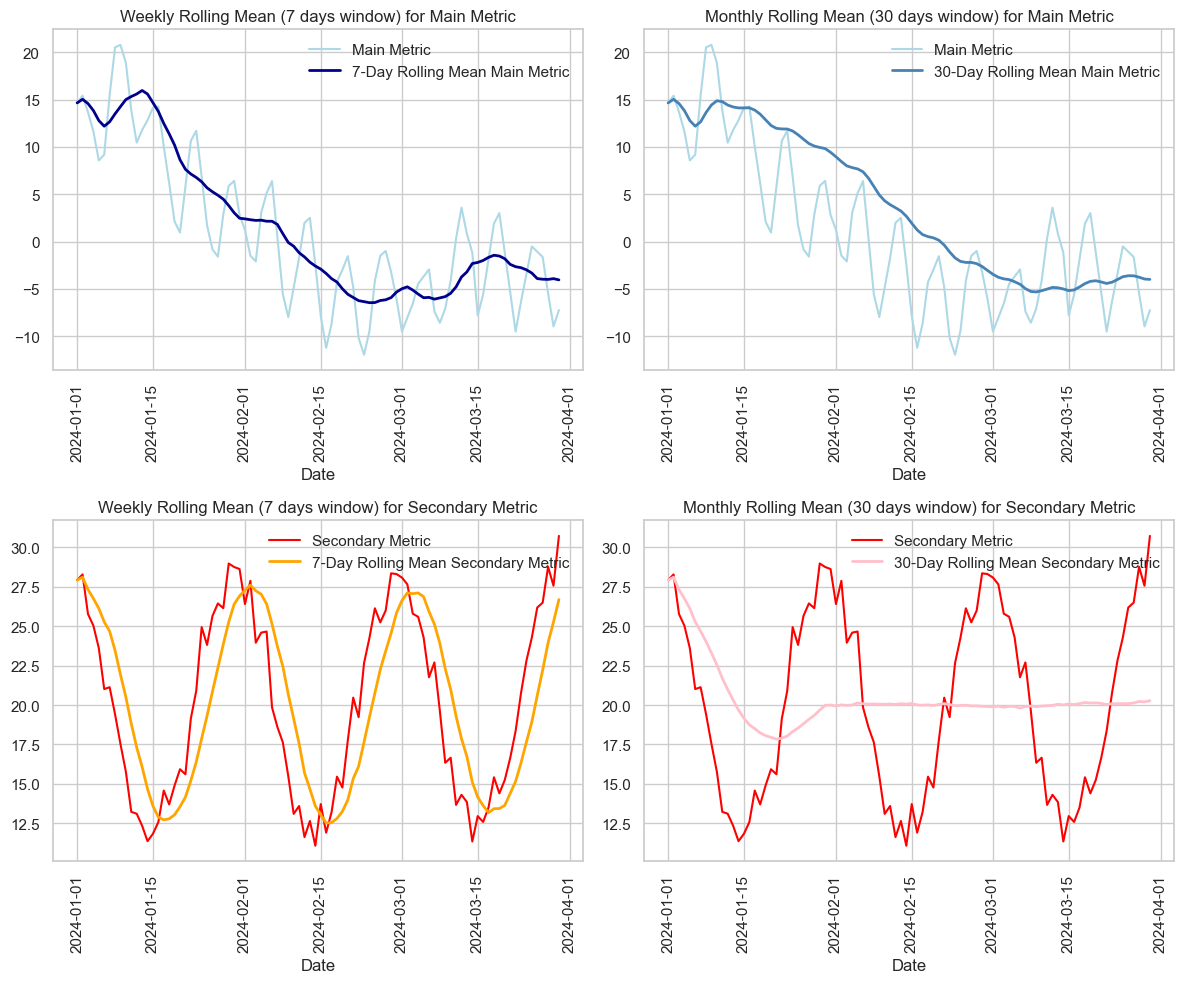

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
ax[0,0].plot(df_filled['Main_Metric'], label='Main Metric', color='lightblue')
ax[0,0].plot(df_filled['Main_weekly_Rolling'], label='7-Day Rolling Mean Main Metric', color='darkblue', linewidth=2)
ax[0,0].set_title('Weekly Rolling Mean (7 days window) for Main Metric')
ax[0,0].set_xlabel('Date')
ax[0,0].grid(True)
ax[0,0].legend()
ax[0,0].tick_params(axis='x', rotation=90) 

ax[0,1].plot(df_filled['Main_Metric'], label='Main Metric', color='lightblue')
ax[0,1].plot(df_filled['Main_monthly_Rolling'], label='30-Day Rolling Mean Main Metric', color='steelblue', linewidth=2)
ax[0,1].set_title('Monthly Rolling Mean (30 days window) for Main Metric')
ax[0,1].set_xlabel('Date')
ax[0,1].grid(True)
ax[0,1].legend()
ax[0,1].tick_params(axis='x', rotation=90) 

ax[1,0].plot(df_filled['Secondary_Metric'], label='Secondary Metric', color='red')
ax[1,0].plot(df_filled['Secondary_weekly_Rolling'], label='7-Day Rolling Mean Secondary Metric', color='orange', linewidth=2)
ax[1,0].set_title('Weekly Rolling Mean (7 days window) for Secondary Metric')
ax[1,0].set_xlabel('Date')
ax[1,0].grid(True)
ax[1,0].legend()
ax[1,0].tick_params(axis='x', rotation=90) 

ax[1,1].plot(df_filled['Secondary_Metric'], label='Secondary Metric', color='red')
ax[1,1].plot(df_filled['Secondary_monthly_Rolling'], label='30-Day Rolling Mean Secondary Metric', color='pink', linewidth=2)
ax[1,1].set_title('Monthly Rolling Mean (30 days window) for Secondary Metric')
ax[1,1].set_xlabel('Date')
ax[1,1].grid(True)
ax[1,1].legend()
ax[1,1].tick_params(axis='x', rotation=90) 

plt.tight_layout()
# plt.xticks(rotation=90) # wont work perfectly for subplots
plt.show()

### Why Use Resampling?
For aggregating time series data: Resampling allows you to convert data into different time frequencies (e.g., daily to monthly) and compute aggregates such as mean, sum, median, etc.

Downsampling: Resampling is often used for downsampling time series data (e.g., converting daily data to monthly or yearly data) to smooth out short-term fluctuations and identify long-term trends.

### Resampling Methods:
You can also use other aggregation methods such as:

sum(): Sums up the values for each group (e.g., total sales per month).

median(): Finds the median of the values in each group.

min() / max(): Gets the minimum or maximum values for each group.

C:\Users\amrkaur\AppData\Local\Temp\1\ipykernel_19148\1412680957.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.resample('M').mean()


<Axes: xlabel='Date'>

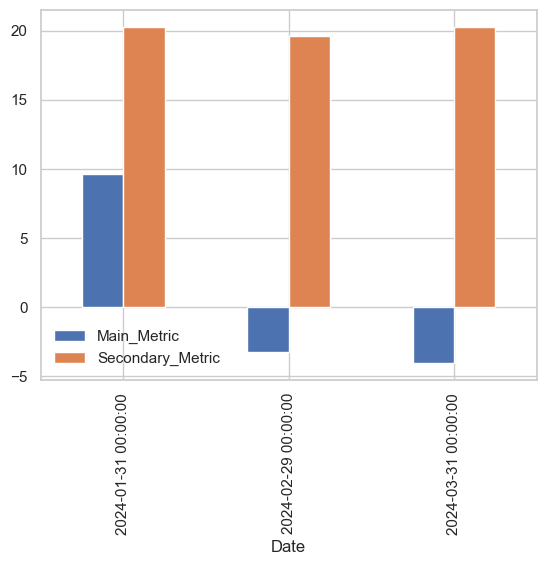

In [35]:
# or resampling (preferred) 
# If you want to aggregate your data monthly before calculating the rolling mean, you can use resampling and then calculate the rolling average 
# on the monthly data.
# Resample to monthly frequency (mean for each month). It can also be done weekly
df_monthly = df_timeseries.copy()
df_monthly.set_index('Date', inplace=True)
df_monthly['Main_Metric'] = df_monthly['Main_Metric'].interpolate(method='time')
# Resamples the data to a monthly frequency and takes the mean for each month. You can also use other aggregations like sum or median.
df_monthly = df_monthly.resample('M').mean()
df_monthly.plot(kind='bar')

### Key Differences:
 
Using rolling(window='30D'): Works with a rolling window of days. It calculates the rolling mean over the last 30 days (or the number of data points within 30 days if some days are missing).

Using resample('M'): Resamples the data by month (or any frequency), so this is useful when you want to aggregate by month first, then apply a rolling operation.

### Which One to Choose?

Use rolling(window='30D') if your data is daily and you want to smooth out 30-day rolling windows regardless of the calendar month.

Use resample('M') if you want to work with monthly data (e.g., average per month) before applying a rolling statistic.

In [36]:
# Perform rolling mean on the resampled monthly data (e.g., using a 2-month window)
df_monthly['Rolling_monthly_main'] = df_monthly['Main_Metric'].rolling(window=2).mean()
df_monthly['Rolling_monthly_secondary'] = df_monthly['Secondary_Metric'].rolling(window=2).mean()
df_monthly

,Main_Metric,Secondary_Metric,Rolling_monthly_main,Rolling_monthly_secondary
Date,,,,
2024-01-31,9.597419,20.259032,NaN,NaN
2024-02-29,-3.261207,19.605862,3.168106,19.932447
2024-03-31,-4.003500,20.278667,-3.632353,19.942264


<Axes: xlabel='Date'>

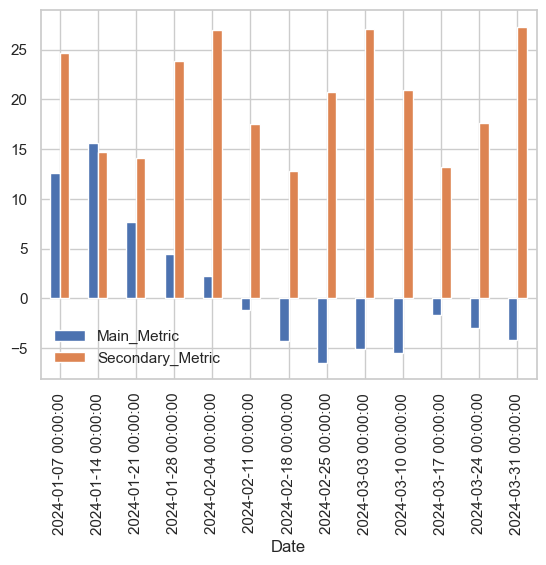

In [37]:
df_weekly = df_timeseries.copy()
df_weekly.set_index('Date', inplace=True)
df_weekly['Main_Metric'] = df_weekly['Main_Metric'].interpolate(method='time')
# Resamples the data to a weekly frequency and takes the mean for each week. You can also use other aggregations like sum or median.
df_weekly = df_weekly.resample('W').mean()
df_weekly.plot(kind='bar')

In [38]:
# Perform rolling mean on the resampled monthly data (e.g., using a 2-month window)
df_weekly['Rolling_weekly_main'] = df_weekly['Main_Metric'].rolling(window=2).mean()
df_weekly['Rolling_weekly_secondary'] = df_weekly['Secondary_Metric'].rolling(window=2).mean()
df_weekly

,Main_Metric,Secondary_Metric,Rolling_weekly_main,Rolling_weekly_secondary
Date,,,,
2024-01-07,12.652857,24.678571,NaN,NaN
2024-01-14,15.585714,14.682857,14.119286,19.680714
2024-01-21,7.635714,14.162857,11.610714,14.422857
2024-01-28,4.472857,23.860000,6.054286,19.011429
2024-02-04,2.252857,27.021429,3.362857,25.440714
2024-02-11,-1.183571,17.562857,0.534643,22.292143
2024-02-18,-4.285714,12.808571,-2.734643,15.185714
2024-02-25,-6.451429,20.754286,-5.368571,16.781429
2024-03-03,-5.135000,27.057143,-5.793214,23.905714


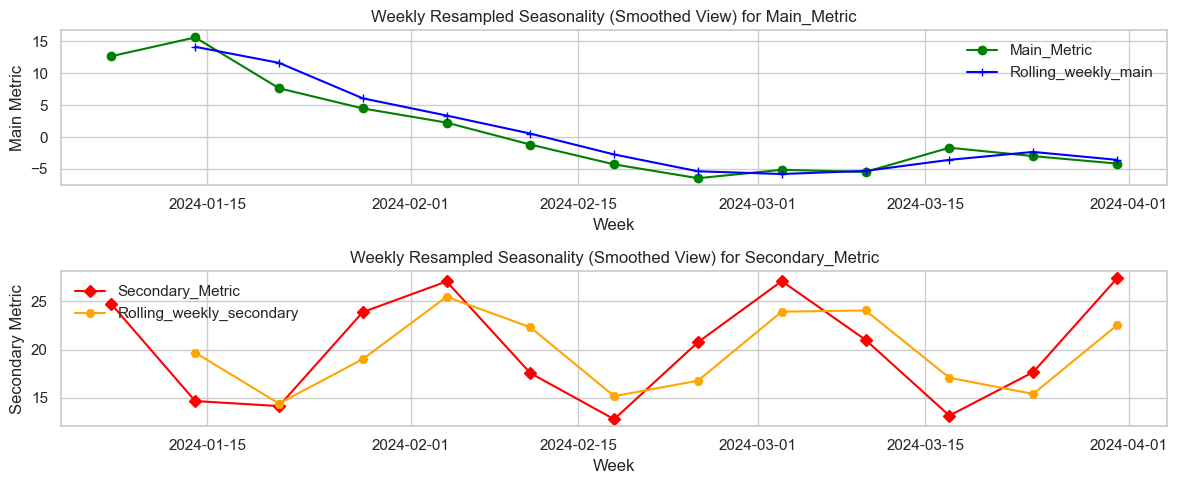

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5))
ax[0].plot(df_weekly.index, df_weekly['Main_Metric'], marker='o', color='green', label='Main_Metric')
ax[0].plot(df_weekly.index, df_weekly['Rolling_weekly_main'], marker='+', color='blue', label='Rolling_weekly_main')
ax[0].set_title("Weekly Resampled Seasonality (Smoothed View) for Main_Metric")
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Main Metric')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(df_weekly.index, df_weekly['Secondary_Metric'], marker='D', color='red', label='Secondary_Metric')
ax[1].plot(df_weekly.index, df_weekly['Rolling_weekly_secondary'], marker='H', color='orange', label='Rolling_weekly_secondary')
ax[1].set_title("Weekly Resampled Seasonality (Smoothed View) for Secondary_Metric")
ax[1].set_xlabel('Week')
ax[1].set_ylabel('Secondary Metric')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

### Bonus - Statsmodels Seasonal Decomposition

In [40]:
# pip install statsmodels

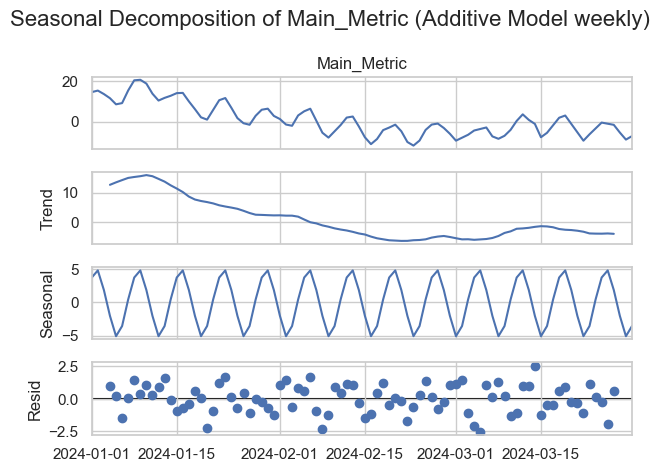

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Component	and What it shows
# Trend	- Underlying long-term direction
# Seasonal - Repeating weekly pattern (e.g. day of week)
# Residual - What's left after removing trend + season (Noise)
# Decompose using weekly seasonality (period=7)
weekly_result = seasonal_decompose(df_filled['Main_Metric'], model='additive', period=7)

# Plot the decomposition
weekly_result.plot()
plt.suptitle("Seasonal Decomposition of Main_Metric (Additive Model weekly)", fontsize=16) # suptitle-Supertitle
plt.tight_layout()
plt.show()

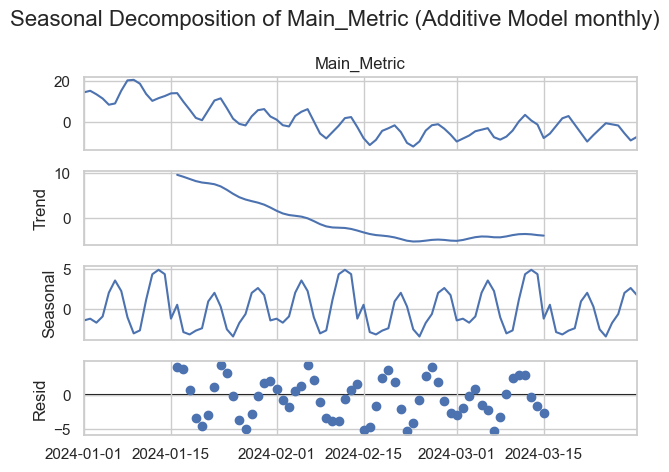

In [42]:
# Decompose using monthly seasonality (period=30)
monthly_result = seasonal_decompose(df_filled['Main_Metric'], model='additive', period=30)

# Plot the decomposition
monthly_result.plot()
plt.suptitle("Seasonal Decomposition of Main_Metric (Additive Model monthly)", fontsize=16)
plt.tight_layout()
plt.show()

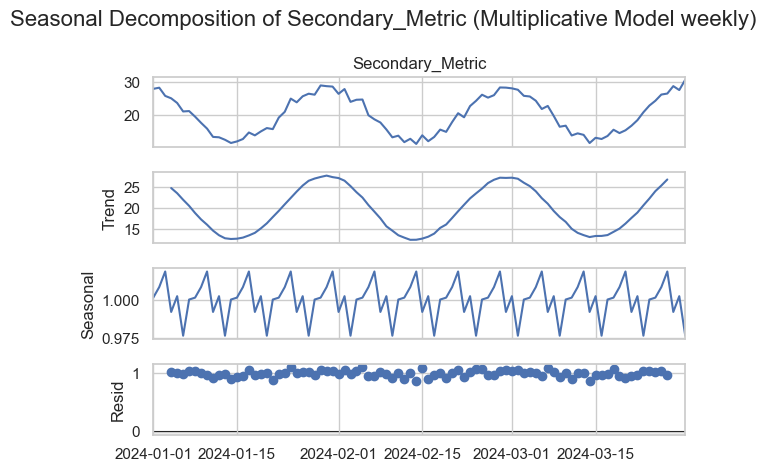

In [43]:
# Decompose using weekly seasonality (period=7)
weekly_result = seasonal_decompose(df_filled['Secondary_Metric'], model='multiplicative', period=7)

# Plot the decomposition
weekly_result.plot()
plt.suptitle("Seasonal Decomposition of Secondary_Metric (Multiplicative Model weekly)", fontsize=16)
plt.tight_layout()
plt.show()

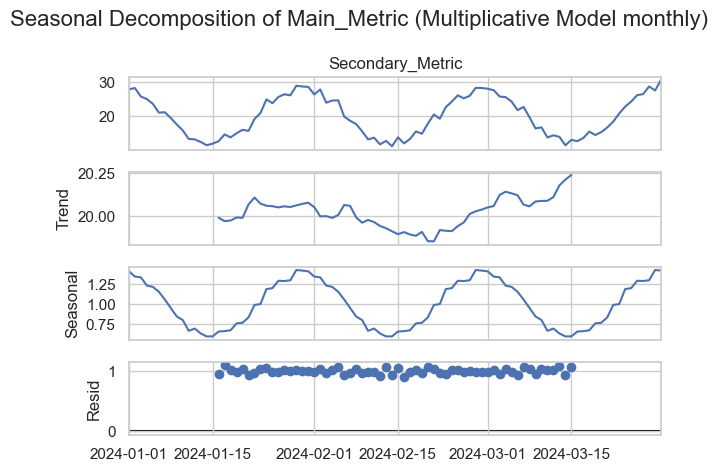

In [44]:
# Decompose using monthly seasonality (period=30)
monthly_result = seasonal_decompose(df_filled['Secondary_Metric'], model='multiplicative', period=30)

# Plot the decomposition
monthly_result.plot()
plt.suptitle("Seasonal Decomposition of Main_Metric (Multiplicative Model monthly)", fontsize=16)
plt.tight_layout()
plt.show()

### Autocorrelation plot

This function plots the autocorrelation of the data over several time lags.

It is a quick way to visually inspect whether there is any repeating pattern or memory in the time series.

The presence of significant autocorrelation at certain lags may suggest that a time series model, such as ARIMA, could be useful for forecasting.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

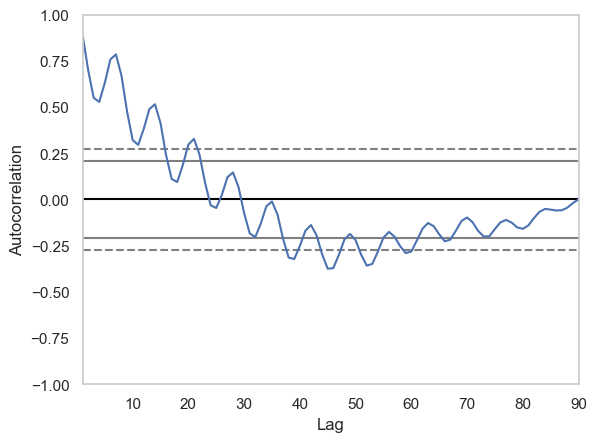

In [45]:
from pandas.plotting import autocorrelation_plot
# Use: Autocorrelation helps you understand how a time series is related to its past values — helps before forecasting
autocorrelation_plot(df_filled['Main_Metric'])

What does the plot show?:

The plot will show a series of bars (one for each lag). The height of each bar shows the strength of the correlation between the time series and its lagged values.

The blue bars represent the autocorrelation coefficients, and the dashed lines are the confidence intervals (usually 95% confidence).

If the autocorrelation of the time series is high at a particular lag (meaning a high correlation between values at that lag), this might indicate that the time series has a seasonality or trend that can be used for forecasting.

What to Look For:
Significant peaks: A peak above the confidence interval at a certain lag suggests a strong autocorrelation at that time point, which could indicate seasonality or periodic patterns.

Decay in correlation: If the autocorrelation diminishes quickly with increasing lags, it might indicate that the time series is more random or doesn't have long-term memory.

Patterns: If you see significant periodic oscillations in the plot, it might point to seasonality (e.g., yearly, monthly patterns).

When to use Autocorrelation?
Autocorrelation is especially useful when:

You're trying to understand the temporal structure in the data (e.g., seasonality or trends).

You're considering forecasting models, such as ARIMA (AutoRegressive Integrated Moving Average), where autocorrelation plays a crucial role in identifying appropriate model parameters (p, d, q).

Before applying complex models, this helps to visually understand whether there is any memory or predictable pattern in the data.



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

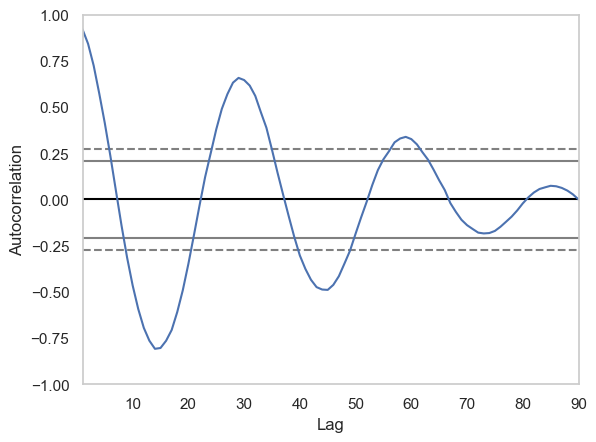

In [46]:
autocorrelation_plot(df_filled['Secondary_Metric'])